#### Loading data

In [1]:
import pandas as pd
import sqlite3

In [2]:
disc_path = '/media/wilfredo/TOSHIBA EXT/root_extDisk/development/DS/5_Capstone_proj'

files_path = disc_path+'/data/json_ieee/'

dbName = "covid_ieee.db"
dbCov_conn = sqlite3.connect(disc_path+"/dbSQLites/"+dbName)

In [3]:
def f_run_query(query):
    return pd.read_sql_query(query,dbCov_conn)

In [4]:
df_ieee = f_run_query("""
SELECT uuid, title, text, url, published_dtint
from covid_ieee2
WHERE ( thread_fb_likes > 0
or thread_fb_shares > 0 
or thread_fb_comments > 0 )
and published_dtint > 20200300;
""")

dbCov_conn.close()

In [5]:
print(df_ieee.shape)
df_ieee.info()

(104517, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104517 entries, 0 to 104516
Data columns (total 5 columns):
uuid               104517 non-null object
title              104517 non-null object
text               104517 non-null object
url                104517 non-null object
published_dtint    104517 non-null int64
dtypes: int64(1), object(4)
memory usage: 4.0+ MB


In [6]:
df_ieee.isnull().sum()

uuid               0
title              0
text               0
url                0
published_dtint    0
dtype: int64

Some Feauture engineering

In [7]:
df_ieee['title_count'] = df_ieee['title'].apply(lambda x: len(x.strip().split()) )
df_ieee['text_count']   = df_ieee['text'].apply(lambda x: len(x.strip().split()) )
df_ieee['text_count_unique'] = df_ieee['text'].apply(lambda x:len(set(str(x).split())) )
df_ieee.head()

,uuid,title,text,url,published_dtint,title_count,text_count,text_count_unique
0,d11f090a7d1724f61ea73f3c92974c2ba8f30252,Coronavirus profiteering: Trade Me user sellin...,While supermarkets urge customers not to stock...,https://www.stuff.co.nz/national/health/119916...,20200301,11,459,273
1,15969b6f57849f9d0437ae9de061a8b1528b21cd,Coronavirus: Can you catch coronavirus twice?,Experts say despite reports of people being ab...,https://www.stuff.co.nz/national/health/119914...,20200301,6,603,327
2,96dc781d9df893e1a0bba60aa91e56525e46f015,Reviewing estimates of the basic reproduction ...,European Centre for Disease Prevention and Con...,https://www.ecdc.europa.eu/en,20200301,16,403,233
3,19abc4d5cde4e5ff1493b1ac9228bde0c987f7db,Sunday Morning Futures w/ Maria Bartiromo - Su...,On today's episode of 'Sunday Morning Futures'...,http://video.foxnews.com/v/6137464031001/,20200301,16,41,38
4,b5bb9f8da02662666d351a5914bf028eb8d5a89f,Nostradamus prediction: Prophet warned Italy o...,The coronavirus has spread to at least 67 coun...,https://www.express.co.uk/news/weird/1249539/N...,20200301,13,732,451


In [8]:
df_ieee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104517 entries, 0 to 104516
Data columns (total 8 columns):
uuid                 104517 non-null object
title                104517 non-null object
text                 104517 non-null object
url                  104517 non-null object
published_dtint      104517 non-null int64
title_count          104517 non-null int64
text_count           104517 non-null int64
text_count_unique    104517 non-null int64
dtypes: int64(4), object(4)
memory usage: 6.4+ MB


In [9]:
df_ieee['text'].describe(include='all')

count     104517
unique    102602
top             
freq         141
Name: text, dtype: object

#### Removing possible duplicates based on column title and text

In [10]:
df_ieee.drop_duplicates(['title', 'text'], inplace=True)
df_ieee['text'].describe(include='all')

count     103591
unique    102602
top             
freq         140
Name: text, dtype: object

In [11]:
df_ieee['title'].describe(include='all')

count               103591
unique               98667
top       EarthLink - News
freq                   194
Name: title, dtype: object

#### Take a Look at the Data:

In [12]:
df_ieee.head()

,uuid,title,text,url,published_dtint,title_count,text_count,text_count_unique
0,d11f090a7d1724f61ea73f3c92974c2ba8f30252,Coronavirus profiteering: Trade Me user sellin...,While supermarkets urge customers not to stock...,https://www.stuff.co.nz/national/health/119916...,20200301,11,459,273
1,15969b6f57849f9d0437ae9de061a8b1528b21cd,Coronavirus: Can you catch coronavirus twice?,Experts say despite reports of people being ab...,https://www.stuff.co.nz/national/health/119914...,20200301,6,603,327
2,96dc781d9df893e1a0bba60aa91e56525e46f015,Reviewing estimates of the basic reproduction ...,European Centre for Disease Prevention and Con...,https://www.ecdc.europa.eu/en,20200301,16,403,233
3,19abc4d5cde4e5ff1493b1ac9228bde0c987f7db,Sunday Morning Futures w/ Maria Bartiromo - Su...,On today's episode of 'Sunday Morning Futures'...,http://video.foxnews.com/v/6137464031001/,20200301,16,41,38
4,b5bb9f8da02662666d351a5914bf028eb8d5a89f,Nostradamus prediction: Prophet warned Italy o...,The coronavirus has spread to at least 67 coun...,https://www.express.co.uk/news/weird/1249539/N...,20200301,13,732,451


In [13]:
df_ieee.describe()

,published_dtint,title_count,text_count,text_count_unique
count,1.035910e+05,103591.000000,103591.000000,103591.000000
mean,2.020032e+07,11.624514,595.393046,320.648020
std,7.221096e+00,3.700817,627.379309,239.147422
min,2.020030e+07,0.000000,0.000000,0.000000
25%,2.020031e+07,9.000000,271.000000,174.000000
50%,2.020032e+07,11.000000,463.000000,274.000000
75%,2.020032e+07,14.000000,754.000000,415.000000
max,2.020033e+07,62.000000,16704.000000,4783.000000


#### Taking `25000` samples for brief calculus

In [14]:
df = df_ieee.sample(25000, random_state=2)
del df_ieee

In [15]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 86305 to 99416
Data columns (total 8 columns):
uuid                 25000 non-null object
title                25000 non-null object
text                 25000 non-null object
url                  25000 non-null object
published_dtint      25000 non-null int64
title_count          25000 non-null int64
text_count           25000 non-null int64
text_count_unique    25000 non-null int64
dtypes: int64(4), object(4)
memory usage: 1.7+ MB


#### Using Spacy for tex processing

In [16]:
#NLP 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg  # model downloaded in previous step

In [17]:
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['me',
 'herself',
 'off',
 'if',
 'another',
 'anywhere',
 'via',
 'whereby',
 'five',
 'make']

In [19]:
# Parser
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000

def f_spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

Applying the text-processing function on the body_text.

In [20]:
from tqdm import tqdm

tqdm.pandas()
df["processed_text"] = df["text"].progress_apply(f_spacy_tokenizer)

100%|██████████| 25000/25000 [19:26<00:00, 21.43it/s]


In [21]:
import seaborn as sns

count    25000.00000
mean       593.86628
std        629.73857
min          0.00000
25%        270.00000
50%        462.00000
75%        750.00000
max      16386.00000
Name: text_count, dtype: float64

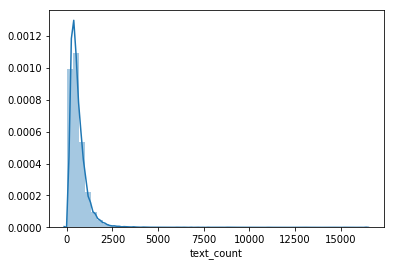

In [22]:
sns.distplot(df['text_count'])
df['text_count'].describe()

count    25000.000000
mean       319.749600
std        239.262168
min          0.000000
25%        174.000000
50%        274.000000
75%        413.000000
max       4543.000000
Name: text_count_unique, dtype: float64

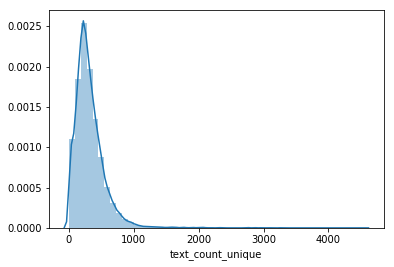

In [23]:
sns.distplot(df['text_count_unique'])
df['text_count_unique'].describe()

#### Vectorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

def f_vectorize(text, maxx_features):   #maxx_features
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

Vectorize our data. We will be clustering based off the content of the body text. The maximum number of features will be limited. Only the top 2 ** 12 features will be used, eseentially acting as a noise filter. Additionally, more features cause painfully long runtimes.

In [25]:
text = df['processed_text'].values
X = f_vectorize(text, 2 ** 12)  #2**12 = 4096
X.shape

(25000, 4096)

### PCA & Clustering

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=2)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(25000, 2978)

In [27]:
from sklearn.cluster import KMeans

#### find best n_clusters

In [28]:
from datetime import datetime

In [32]:
import numpy as np
from sklearn import metrics
from scipy.spatial.distance import cdist

print("started :", datetime.now().time())

# run kmeans with many different k
distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=2).fit(X_reduced)
    
    distortions.append(sum( np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1) ) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

print("end :", datetime.now().time())

started : 03:56:33.496665
end : 07:32:55.201870


started : 12:38:17.158851


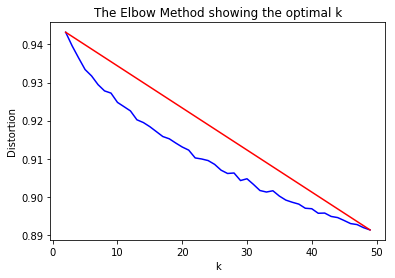

end : 12:38:17.297725


In [34]:
import matplotlib.pyplot as plt

print("started :", datetime.now().time())

X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

print("end :", datetime.now().time())

### Run k-means
Now that we have an appropriate k value, we can run k-means on the PCA-processed feature vector (X_reduced).

In [29]:
k = 13 #20
kmeans = KMeans(n_clusters=k, random_state=2)

y_pred = kmeans.fit_predict(X_reduced)  #y_pred = kmeans.fit(X_reduced); y_pred.predict(X_reduced)

df['y'] = y_pred

In [30]:
df['y'].unique()

array([ 5,  0, 12, 11,  9,  1,  4,  6,  8,  3,  7, 10,  2])

### Verify our clustering by Classifying it
After running kmeans and that the data is now "labeled", we should now be able to use supervised learning to see how well the clustering generalizes.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y_pred, test_size=0.2, random_state=2)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 20000
X_test size: 5000 



In [31]:
# function to print out classification model report
def f_classification_report(model_name, test, pred):
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    print(model_name, ":\n")
    
    print("Accuracy Score: ", '{:,.3f}'
          .format( float(accuracy_score(test, pred)) * 100 ), "%")
    
    print("     Precision: ", '{:,.3f}'
          .format( float(precision_score(test, pred, average='macro')) * 100 ), "%")
    
    print("        Recall: ", '{:,.3f}'
          .format( float(recall_score(test, pred, average='macro')) * 100 ), "%")
    
    print("      F1 score: ", '{:,.3f}'
          .format( float(f1_score(test, pred, average='macro')) * 100 ), "%")

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# SGD instance
sgd_clf = SGDClassifier(max_iter=20000, tol=1e-3, random_state=2, n_jobs=4)

# train SGD
sgd_clf.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=4)

# print out the classification report
f_classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  90.335 %
     Precision:  92.208 %
        Recall:  90.418 %
      F1 score:  91.232 %


To test for overfitting, let's see how the model generalizes over the test set

In [35]:
# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3, n_jobs=4)

# print out the classification report
f_classification_report("Stochastic Gradient Descent Report (Training Set)", y_test, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  86.640 %
     Precision:  89.469 %
        Recall:  86.360 %
      F1 score:  87.808 %


Now let's see how the model can generalize across the whole dataset.